In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Iris.csv')
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
df_numeric = df.drop(columns=['Id','Species'])
corr_mat = df_numeric.corr()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['Species'])
df['Species'] = le.transform(df['Species'])

In [ ]:
df['Species'].unique()

array([0, 1, 2])

In [ ]:
X = df.drop(columns = ['Id','Species'])
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

Confusion Matrix:


<Axes: >

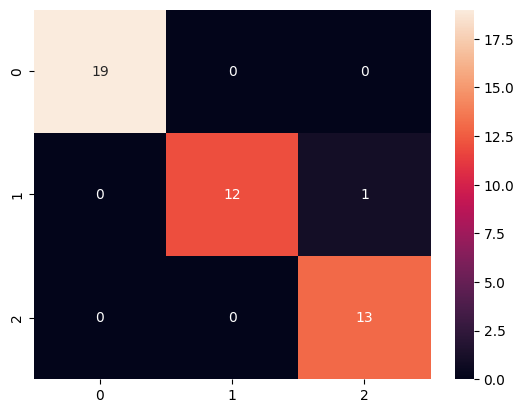

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(cm,annot=True)

In [ ]:
num_classes = len(np.unique(y_test))
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

print("\nClass-wise Metrics:")
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"  True Positives (TP): {TP[i]}")
    print(f"  False Positives (FP): {FP[i]}")
    print(f"  True Negatives (TN): {TN[i]}")
    print(f"  False Negatives (FN): {FN[i]}")

# Compute overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")



Class-wise Metrics:
Class 0:
  True Positives (TP): 19
  False Positives (FP): 0
  True Negatives (TN): 26
  False Negatives (FN): 0
Class 1:
  True Positives (TP): 12
  False Positives (FP): 0
  True Negatives (TN): 32
  False Negatives (FN): 1
Class 2:
  True Positives (TP): 13
  False Positives (FP): 1
  True Negatives (TN): 31
  False Negatives (FN): 0

Accuracy: 0.9778
Error Rate: 0.0222
